In [1]:
import sys
import os

path = os.getcwd()
parent = os.path.dirname(path)
sys.path.append(parent)

In [2]:
from models import LSTM_V3_Model
import matplotlib.pyplot as plt
import datetime

2024-03-26 16:05:27.197438: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-26 16:05:27.198930: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 16:05:27.221410: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 16:05:27.221442: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 16:05:27.221457: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
stock_models = {}
stock_accuracy = {}
stock_f1_scores = {}
stock_roc_curves = {}

tickers = ["GOOG", "MSFT", "AMZN", "AAPL", "META"]

In [4]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2023, 12, 31)

stock_accuracy = {}
stock_f1_scores = {}

In [5]:
for ticker in tickers:
    stock_models[ticker] = LSTM_V3_Model.LSTM_V3_Model(ticker, start, end, 100, 64, 32)
    stock_accuracy[ticker], stock_f1_scores[ticker ] = stock_models[ticker].predict()

[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 17ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 10ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 10ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 12ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 10ms/step


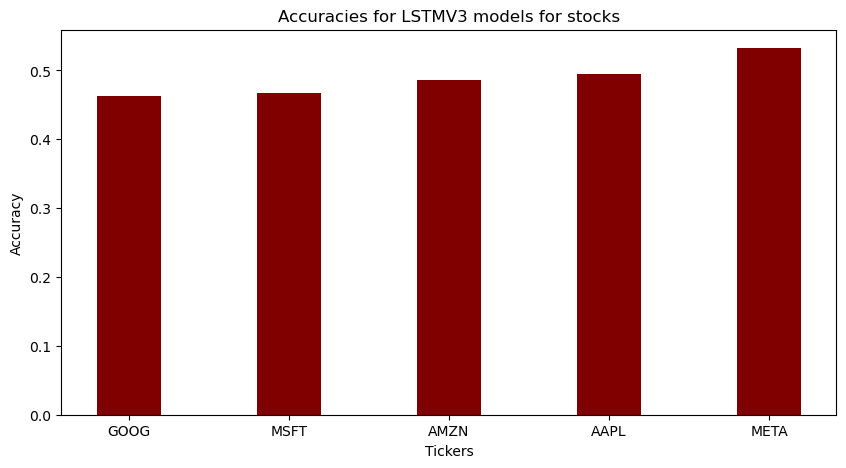

In [6]:
accuracies = list(stock_accuracy.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, accuracies, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("Accuracy")
plt.title("Accuracies for LSTMV3 models for stocks")
plt.show()

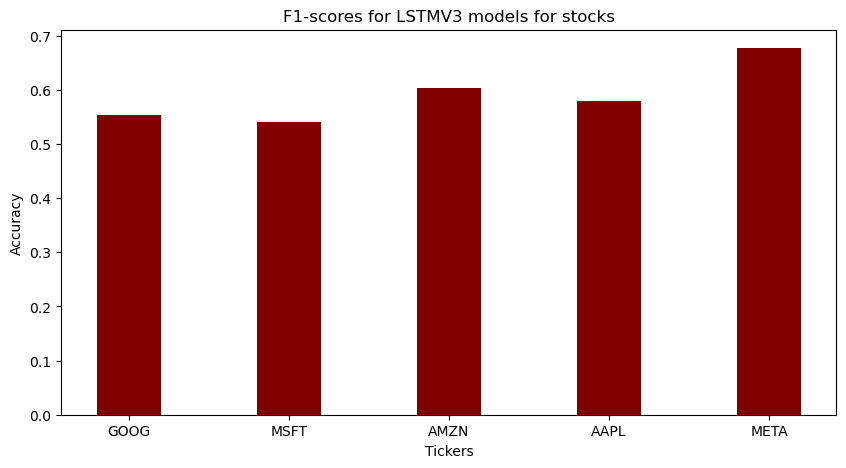

In [7]:
f1_scores = list(stock_f1_scores.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, f1_scores, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("Accuracy")
plt.title("F1-scores for LSTMV3 models for stocks")
plt.show()

In [8]:
stock_accuracy

{'GOOG': 0.46360153256704983,
 'MSFT': 0.4674329501915709,
 'AMZN': 0.48659003831417624,
 'AAPL': 0.4942528735632184,
 'META': 0.5325670498084292}

In [9]:
stock_f1_scores

{'GOOG': 0.554140127388535,
 'MSFT': 0.5412541254125413,
 'AMZN': 0.603550295857988,
 'AAPL': 0.5796178343949046,
 'META': 0.6772486772486772}

In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("F1-Score: ", f1_score(stock_models["META"].y_test,stock_models["META"].y_pred))
print("Precision: ", precision_score(stock_models["META"].y_test,stock_models["META"].y_pred))
print("Recall: ", recall_score(stock_models["META"].y_test,stock_models["META"].y_pred))


F1-Score:  0.6772486772486772
Precision:  0.540084388185654
Recall:  0.9078014184397163


In [11]:
stock_models["META"].measure_classification()

====== META Classification report ======
                precision    recall  f1-score   support

  direction_up       0.46      0.09      0.15       120
direction_down       0.54      0.91      0.68       141

      accuracy                           0.53       261
     macro avg       0.50      0.50      0.42       261
  weighted avg       0.50      0.53      0.44       261

[[128  13]
 [109  11]]
